In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame, Panel
from sklearn import preprocessing
pd.set_option('display.max_rows',15)

In [349]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/sunny/.conda/envs/py3env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e', 'split']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [350]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [351]:
pd.__version__

'0.22.0'

In [352]:
bitcoin = pd.read_csv ('./bitcoin_price.csv', parse_dates = True, index_col = [0])

In [353]:
bitcoin

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-02-20,11231.80,11958.50,11231.80,11403.70,"9,926,540,000","189,536,000,000"
2018-02-19,10552.60,11273.80,10513.20,11225.30,"7,652,090,000","178,055,000,000"
2018-02-18,11123.40,11349.80,10326.00,10551.80,"8,744,010,000","187,663,000,000"
2018-02-17,10207.50,11139.50,10149.40,11112.70,"8,660,880,000","172,191,000,000"
2018-02-16,10135.70,10324.10,9824.82,10233.90,"7,296,160,000","170,960,000,000"
2018-02-15,9488.32,10234.80,9395.58,10166.40,"9,062,540,000","160,025,000,000"
2018-02-14,8599.92,9518.54,8599.92,9494.63,"7,909,820,000","145,023,000,000"
...,...,...,...,...,...,...
2013-05-04,98.10,115.00,92.50,112.50,-,"1,089,890,000"


In [354]:
bitcoin = bitcoin.sort_index(ascending = True)

In [355]:
bitcoin

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
2013-05-03,106.25,108.13,79.10,97.75,-,"1,180,070,000"
2013-05-04,98.10,115.00,92.50,112.50,-,"1,089,890,000"
...,...,...,...,...,...,...
2018-02-14,8599.92,9518.54,8599.92,9494.63,"7,909,820,000","145,023,000,000"


In [356]:
bitcoin.shape

(1760, 6)

In [357]:
bitClose = bitcoin['Close']

In [358]:
bitClose = pd.DataFrame(bitClose)
bitClose

,Close
Date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21
2013-05-03,97.75
2013-05-04,112.50
...,...
2018-02-14,9494.63


Text(0.5,1,'Close Price')

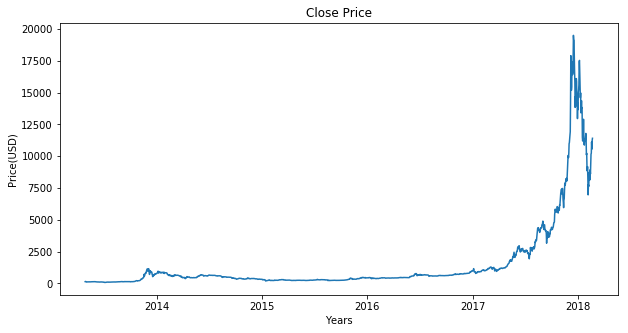

In [359]:
plt.figure(figsize = (10, 5))
plt.plot(bitClose)
plt.xlabel('Years')
plt.ylabel('Price(USD)')
plt.title('Close Price')

In [360]:
rolMean = bitClose.rolling(window = 7).mean()
rolVar = bitClose.rolling(window = 7).std()

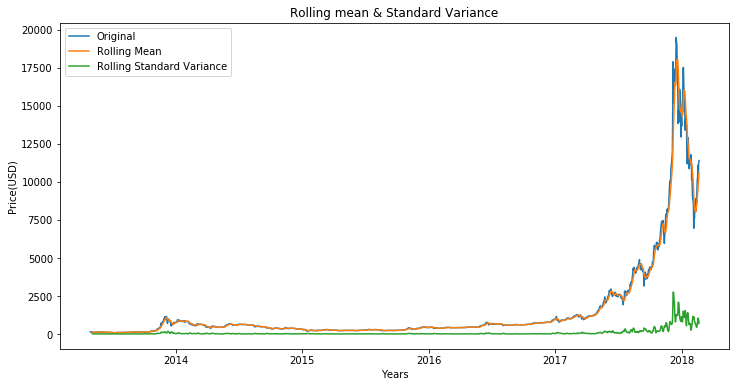

In [361]:
plt.figure(figsize=(12,6))
plt.plot(bitClose, label = 'Original')
plt.plot(rolMean,label = 'Rolling Mean')
plt.plot(rolVar, label = 'Rolling Standard Variance')
plt.legend(loc = 'best')
plt.title('Rolling mean & Standard Variance')
plt.xlabel('Years')
plt.ylabel('Price(USD)')
plt.show()

In [362]:
UpperBand = rolMean + rolVar * 2
LowerBand = rolMean - rolVar * 2

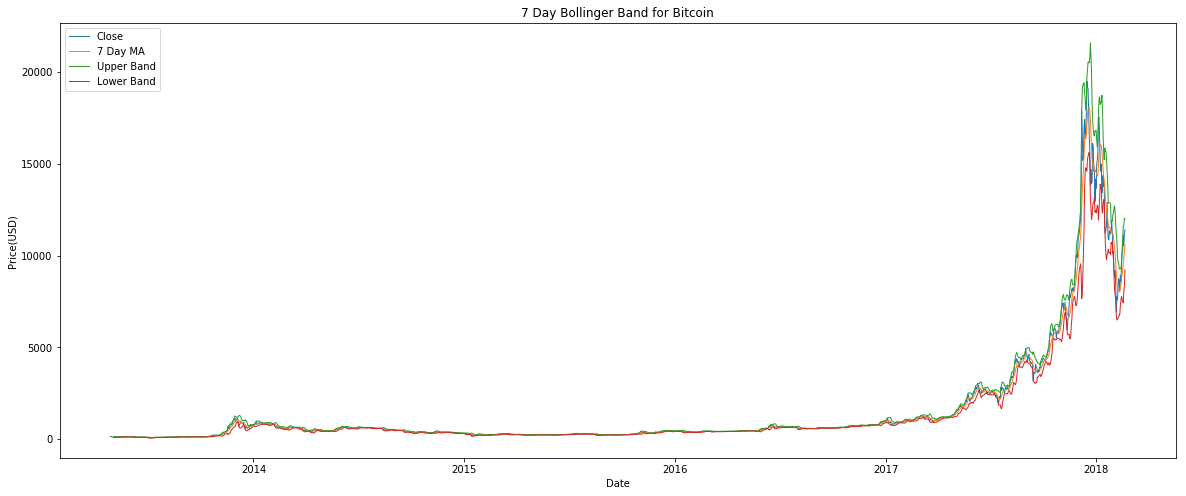

In [363]:
plt.figure(figsize=(20,8))
plt.plot(bitClose, label='Close',linewidth=1.0)
plt.plot(rolMean,label='7 Day MA',linewidth=1.0)
plt.plot(UpperBand,label='Upper Band',linewidth=1.0)
plt.plot(LowerBand,label='Lower Band',linewidth=1.0)
plt.legend(loc='best')
plt.title('7 Day Bollinger Band for Bitcoin')
plt.ylabel('Price(USD)')
plt.xlabel('Date')
plt.show()

In [364]:
bitClose

,Close
Date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21
2013-05-03,97.75
2013-05-04,112.50
...,...
2018-02-14,9494.63


In [365]:
X_scaled=preprocessing.scale(bitClose)

In [366]:
X_scaled

array([[-0.45684347],
       [-0.45335175],
       [-0.45522437],
       ...,
       [ 3.06448669],
       [ 3.29214164],
       [ 3.352444  ]])

In [367]:
import tensorflow as tf

In [368]:
# -------------Dealing with missing values and comma-in-string situation---------------

Date
2013-12-27       46,862,700
2013-12-28       32,505,800
2013-12-29       19,011,300
2013-12-30       20,707,700
2013-12-31       20,897,300
2014-01-01       22,489,400
2014-01-02       38,489,500
                  ...      
2018-02-14    7,909,820,000
2018-02-15    9,062,540,000
2018-02-16    7,296,160,000
2018-02-17    8,660,880,000
2018-02-18    8,744,010,000
2018-02-19    7,652,090,000
2018-02-20    9,926,540,000
Name: Volume, Length: 1517, dtype: object


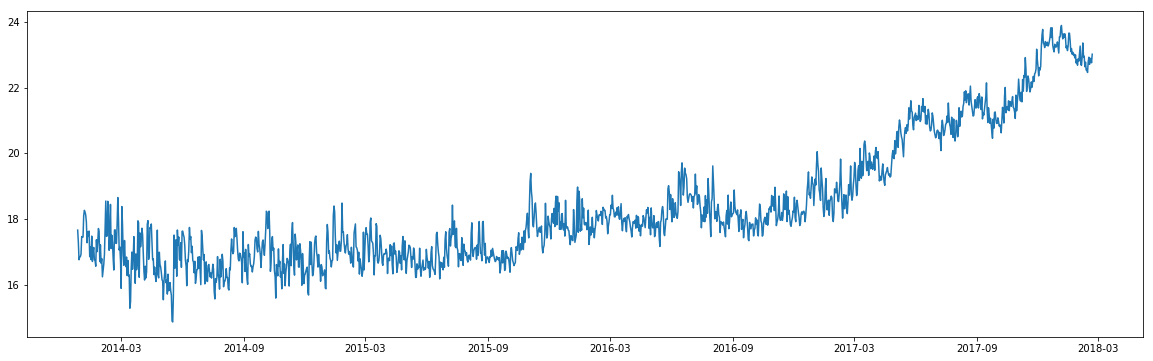

In [369]:
# drop the missing datapoints with '-'
bitVol = bitcoin['Volume']
bitVol_1 = bitVol[bitVol != "-"]
print(bitVol_1)
bitVol_1 = bitVol_1.apply(lambda x: float(x.replace(',', '')))
bitVolNorm_1 = np.log(bitVol_1)

# draw the rest Volume part in Bitcoin database
plt.figure(figsize = (20, 6))
plt.plot(bitVolNorm_1)
plt.show()

bitVolNorm_1

In [ ]:
# extract values of 2014-01 to 2014-09
bitVol2014 = pd.DataFrame(bitVol_1)
bitVol2014 = bitVol2014.loc['2014-01-01':'2014-10-01']
bitVol2014

In [306]:
# calculate the mean value of the range shown above
bitVol2014Mean = bitVol2014['Volume'].mean()
bitVol2014Mean

25801388.321167883

In [307]:
# replace datapoints with value '-' with mean value calculated aboce
bitVol_2 = bitVol[bitVol == "-"]
bitVol_2 = bitVol_2.apply(lambda x: float(x.replace('-', '%f' % (bitVol2014Mean))))
bitVolNorm_2 = np.log(bitVol_2)
bitVolNorm_2

Date
2013-04-28    17.065939
2013-04-29    17.065939
2013-04-30    17.065939
2013-05-01    17.065939
2013-05-02    17.065939
2013-05-03    17.065939
2013-05-04    17.065939
                ...    
2013-12-20    17.065939
2013-12-21    17.065939
2013-12-22    17.065939
2013-12-23    17.065939
2013-12-24    17.065939
2013-12-25    17.065939
2013-12-26    17.065939
Name: Volume, Length: 243, dtype: float64

In [308]:
# update the values on original dataset
bitVol.update(bitVol_2)

In [309]:
# update the values on original dataset
bitVol.update(bitVol_1)

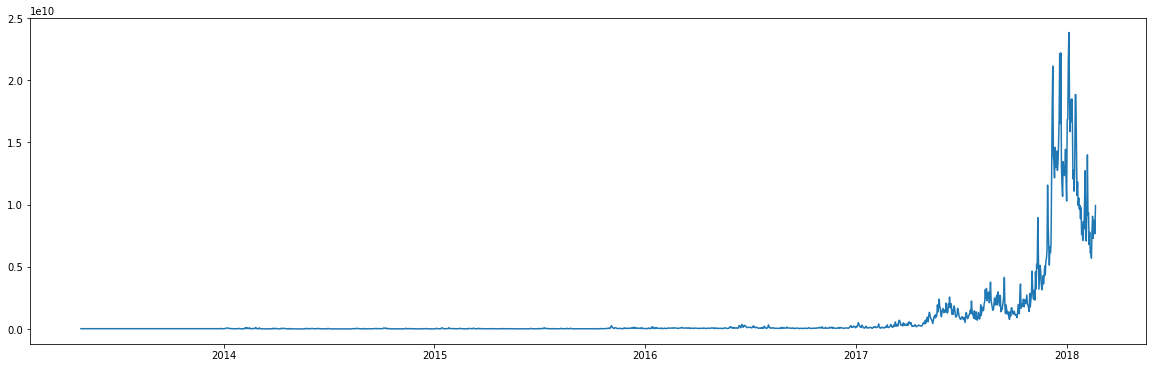

In [310]:
# redraw the total dataset for Volume part
plt.figure(figsize = (20, 6))
plt.plot(bitVol)
plt.show()

In [311]:
type(bitVol)

pandas.core.series.Series

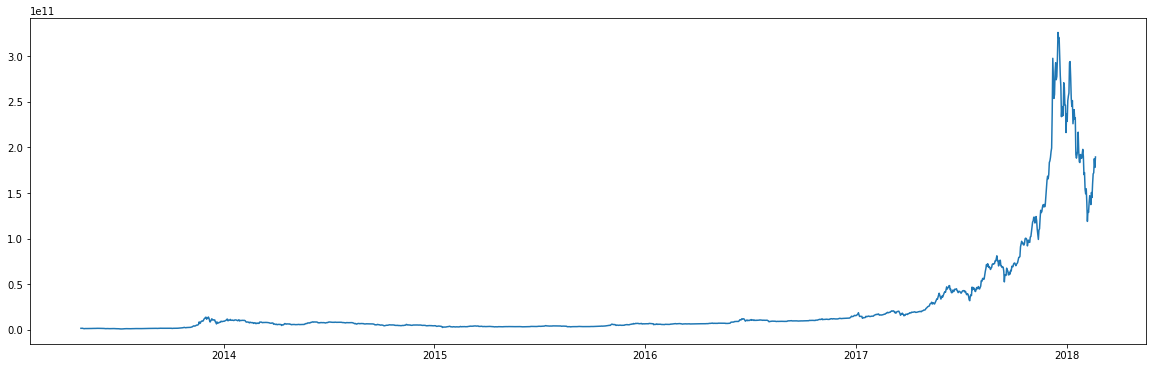

In [312]:
# remove the comma in the dataset for Market Cap
bitMC = bitcoin['Market Cap'].apply(lambda x: float(x.replace(',', '')))

# draw the total dataset for Market Cap part
plt.figure(figsize = (20, 6))
plt.plot(bitMC)
plt.show()

In [313]:
bitcoin['Market Cap'].update(bitMC)
bitcoin['Volume'].update(bitVol)

In [314]:
# ---------------Preparing training and test data--------------------

In [315]:
bitcoin

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,2.58014e+07,1.50052e+09
2013-04-29,134.44,147.49,134.00,144.54,2.58014e+07,1.49116e+09
2013-04-30,144.00,146.93,134.05,139.00,2.58014e+07,1.59778e+09
2013-05-01,139.00,139.89,107.72,116.99,2.58014e+07,1.54282e+09
2013-05-02,116.38,125.60,92.28,105.21,2.58014e+07,1.29219e+09
2013-05-03,106.25,108.13,79.10,97.75,2.58014e+07,1.18007e+09
2013-05-04,98.10,115.00,92.50,112.50,2.58014e+07,1.08989e+09
...,...,...,...,...,...,...
2018-02-14,8599.92,9518.54,8599.92,9494.63,7.90982e+09,1.45023e+11


In [316]:
bitcoin = bitcoin[['Open', 'Close', 'Volume', 'Market Cap']]

In [317]:
bitcoin

,Open,Close,Volume,Market Cap
Date,,,,
2013-04-28,135.30,134.21,2.58014e+07,1.50052e+09
2013-04-29,134.44,144.54,2.58014e+07,1.49116e+09
2013-04-30,144.00,139.00,2.58014e+07,1.59778e+09
2013-05-01,139.00,116.99,2.58014e+07,1.54282e+09
2013-05-02,116.38,105.21,2.58014e+07,1.29219e+09
2013-05-03,106.25,97.75,2.58014e+07,1.18007e+09
2013-05-04,98.10,112.50,2.58014e+07,1.08989e+09
...,...,...,...,...
2018-02-14,8599.92,9494.63,7.90982e+09,1.45023e+11


In [318]:
# scale data
scaler = preprocessing.MinMaxScaler()
scaler.fit(bitcoin)
bitcoin = scaler.transform(bitcoin)

In [319]:
bitcoin

array([[0.003442  , 0.00338567, 0.00096248, 0.00221681],
       [0.00339769, 0.00391735, 0.00096248, 0.00218804],
       [0.00389029, 0.0036322 , 0.00096248, 0.00251574],
       ...,
       [0.56962586, 0.53957415, 0.36668918, 0.57438758],
       [0.54021425, 0.57423888, 0.32088341, 0.54485737],
       [0.57521139, 0.58342105, 0.41629602, 0.58014425]])

In [320]:
# training and test data
split = int(0.9 * bitcoin.shape[0])
train_data = bitcoin[0 : split]
test_data = bitcoin[split:]

In [321]:
test_data.shape

(176, 4)

In [322]:
train_data

array([[0.003442  , 0.00338567, 0.00096248, 0.00221681],
       [0.00339769, 0.00391735, 0.00096248, 0.00218804],
       [0.00389029, 0.0036322 , 0.00096248, 0.00251574],
       ...,
       [0.22174955, 0.22049393, 0.06329178, 0.21966272],
       [0.22036038, 0.22206272, 0.06437618, 0.21831068],
       [0.22238797, 0.2220514 , 0.08207353, 0.2203352 ]])

In [323]:
train_data.shape

(1584, 4)

In [223]:
test_data.shape

(176, 4)

In [324]:
# training set
# input train matrix (1584 x 3)
x_train = train_data[:, [0, 2, 3]]
# output train matrix (1584 x 3)
y_train = train_data[:, 1]
y_train = y_train.reshape(y_train.shape[0], 1)

# testing set
# inpu test matrix (1584 x 3)
x_test = test_data[:, [0, 2, 3]]
# output test matrix (1584 x 1)
y_test = test_data[:, 1]
y_test = y_test.reshape(y_test.shape[0], 1)

In [325]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1584, 3) (1584, 1) (176, 3) (176, 1)


In [326]:
# set number of dataset
n_dataset = x_train.shape[1]

# set number of neurons for each hidden layer
n_neuron_1 = 256
n_neuron_2 = 128
n_neuron_3 = 64
n_target = 1

In [327]:
# Session
net = tf.InteractiveSession()

/home/sunny/.conda/envs/py3env/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [328]:
print(len(y_train), len(y_train) % 128, n_dataset)

1584 48 3


In [329]:
# define the each training set as a placeholder
# input placeholder 
'''
The None argument indicates that at this point we do not yet know the number of 
observations that flow through the neural net graph in each batch
'''
X = tf.placeholder(dtype = tf.float32, name = "X", shape = [None, n_dataset])

# output placeholder
# close_train = tf.placeholder(dtype = tf.float32, name = "close_train", shape = close_train.shape)
Y = tf.placeholder(dtype = tf.float32, name = "Y", shape = [None, 1])

In [330]:
X

<tf.Tensor 'X_2:0' shape=(?, 3) dtype=float32>

In [331]:
Y

<tf.Tensor 'Y_2:0' shape=(?, 1) dtype=float32>

In [332]:
# Initializers
sigma = 1.0
weight_initializer = tf.variance_scaling_initializer(mode = "fan_avg", distribution = "uniform", scale = sigma)
bias_initializer = tf.zeros_initializer()

In [333]:
# model archtecture parameters
# hidden weights + bias

# Layer 1: Variables for hidden weights and biases
w_hidden_1 = tf.Variable(weight_initializer([n_dataset, n_neuron_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neuron_1]))

# Layer 2: Variables for hidden weights and biases
w_hidden_2 = tf.Variable(weight_initializer([n_neuron_1, n_neuron_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neuron_2]))

# Layer 3: Variable for hidden weights and biases
w_hidden_3 = tf.Variable(weight_initializer([n_neuron_2, n_neuron_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neuron_3]))

# Output Layer: Variables for output weights and biases
w_out = tf.Variable(weight_initializer([n_neuron_3, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [334]:
# hidden layer (activation function: ReLU)

# Activation for layer 1
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, w_hidden_1), bias_hidden_1))

# Activation for layer 2
hidden_2 = tf.nn.relu(tf.add(tf.matmul(w_hidden_1, w_hidden_2), bias_hidden_2))

# Activation for layer 3
hidden_3 = tf.nn.relu(tf.add(tf.matmul(w_hidden_2, w_hidden_3), bias_hidden_3))

# Output layer
out = tf.transpose(tf.add(tf.matmul(w_hidden_3, w_out), bias_out))

In [335]:
hidden_1

<tf.Tensor 'Relu_6:0' shape=(?, 256) dtype=float32>

In [336]:
out

<tf.Tensor 'transpose_2:0' shape=(1, 128) dtype=float32>

In [337]:
# cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [338]:
mse

<tf.Tensor 'Mean_2:0' shape=() dtype=float32>

In [339]:
# optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

In [340]:
opt

<tf.Operation 'Adam_2' type=NoOp>

In [341]:
# Initialize all variables
net.run(tf.global_variables_initializer())

In [243]:
# # setup interactive plot
# plt.ion()
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# line1, = ax1.plot(y_test)
# print(y_test.shape, type(y_test))
# line2, = ax1.plot(y_test * 0.5)
# plt.show()

# # number of epochs and batch size
# epochs = 10
# batch_size = 128

# # fit neural net
# mse_train = []
# mse_test = []

# for e in range(epochs):
    
#     # shuffle the training data
#     shuffle_indices = np.random.permutation(np.arange(len(y_train)))
#     x_train = x_train[shuffle_indices]
#     y_train = y_train[shuffle_indices]
    
#     # mini batch training
#     for i in range(0, len(y_train) // batch_size):
#         start = i * batch_size
#         batch_x = x_train[start : start + batch_size]
#         batch_y = y_train[start : start + batch_size]
#         # run optimizer with batch
#         net.run(opt, feed_dict = {X: x_train, Y: y_train})
        
#         # show progress
#         if np.mod(i, 50):
#             # MSE train and test
#             mse_train.append(net.run(mse, feed_dict = {X: x_train, Y: y_train}))
#             mse_test.append(net.run(mse, feed_dict = {X: x_test, Y: y_test}))
#             print('MSE Train: ', mse_train[-1])
#             print('MSE Test: ', mse_test[-1])
#             # Prediction
#             pred = net.run(out, feed_dict = {X: x_test})
#             print('Pred: ', pred.shape)
#             line2.set_ydata(pred)
#             plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
#             plt.pause(0.01)
            

In [342]:
len(y_test)

176

In [343]:
x_test.shape

(176, 3)

In [344]:
# number of epochs and batch size
epochs = 10
batch_size = 128

# fit neural net
mse_train = []
mse_test = []

for e in range(epochs):
    
    # shuffle the training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    x_train = x_train[shuffle_indices]
    y_train = y_train[shuffle_indices]
    
    # mini batch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = x_train[start : start + batch_size]
        batch_y = y_train[start : start + batch_size]
        # run optimizer with batch
        net.run(opt, feed_dict = {X: x_train, Y: y_train})
        
        # show progress
        if np.mod(i, 50):
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict = {X: x_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict = {X: x_test, Y: y_test}))
            # print('MSE Train: ', mse_train[-1])
            # print('MSE Test: ', mse_test[-1])
        # Prediction
        pred = net.run(out, feed_dict = {X: x_test})
        print(pred)

[[-5.67704905e-03  1.02598056e-01 -2.14410555e-02 -1.34010300e-01
  -1.03236459e-01  1.70715183e-01  5.54626323e-02 -6.23648949e-02
   9.73944739e-02 -4.05901000e-02 -2.20758226e-02  1.65562019e-01
   7.16971159e-02  8.34965408e-02 -2.33150925e-02 -3.64105731e-01
  -9.65524912e-02  3.93493958e-02 -1.49412947e-02  1.83658022e-02
   2.73909550e-02 -1.63443819e-01 -2.20127240e-01 -1.13083906e-01
  -6.89851269e-02 -3.43596280e-01  6.17954042e-03 -1.53204575e-01
  -1.16912499e-01 -1.06432885e-01 -9.22158882e-02  9.09939557e-02
   1.35601848e-01 -2.58416712e-01  2.09783643e-01 -1.58858374e-01
  -1.10514410e-01 -1.39467241e-02  6.11488894e-02 -4.15897779e-02
  -1.90578774e-01 -1.80355892e-01 -2.63525303e-02  8.69188607e-02
  -1.71833679e-01  8.40822831e-02 -5.69762699e-02  1.03231899e-01
  -2.96977013e-01  1.91652432e-01 -6.85289279e-02 -5.83745092e-02
  -8.72046128e-02 -9.13084224e-02 -8.77932925e-03  3.47141847e-02
  -2.23453622e-02 -5.62545173e-02 -1.90445557e-01  2.77224872e-02
  -6.92033

[[ 0.01926356  0.02414661  0.02134544  0.04825289  0.05283051  0.01824892
   0.03285079  0.05030919  0.0259161   0.03775014  0.02258926  0.00934306
   0.03810165  0.03022804  0.02357714 -0.11238565  0.06029944  0.02790221
   0.01951389  0.03136124  0.02830323  0.04872819  0.0048277   0.05978961
   0.05873343 -0.07969975  0.02962542  0.05173065  0.05469436  0.06560384
   0.06265935  0.02594925  0.00361664 -0.01346904  0.02918258  0.04468662
   0.06353171  0.02053806  0.03818735  0.04071116  0.01560951  0.04005153
   0.02563163  0.03412463  0.05149574  0.03532023  0.0498132   0.02514529
  -0.03992238  0.02050351  0.0565011   0.05146152  0.06106431  0.05689672
   0.01920777  0.02840851  0.02436326  0.05127716  0.01904921  0.03065847
   0.05403575  0.02065195  0.02552445  0.05708661  0.01796985  0.00935342
   0.02629799  0.00581966  0.02481984  0.03912738  0.04644129  0.0303521
   0.01451207 -0.06660964  0.01145853  0.02624882  0.03022146  0.02796409
   0.06292134  0.02818226  0.02350151  

[[0.02553396 0.02472244 0.03370966 0.02829987 0.02311491 0.02663818
  0.02879172 0.02584971 0.02540244 0.03293157 0.03226201 0.03395597
  0.03066912 0.02687931 0.03360542 0.02454627 0.01936794 0.02957445
  0.02932275 0.02918157 0.03001707 0.03663378 0.04649129 0.02266515
  0.02239781 0.03315229 0.03123401 0.03227466 0.02447401 0.01799702
  0.01963675 0.02544883 0.03670807 0.05132156 0.01612612 0.03678121
  0.01752216 0.02873167 0.03111983 0.03123131 0.04769452 0.03911851
  0.03427386 0.02499014 0.0372079  0.02653441 0.0288223  0.02602714
  0.04710954 0.02179605 0.02155146 0.02525476 0.02031061 0.02220323
  0.02756501 0.02978237 0.03232175 0.02552129 0.04497454 0.02905009
  0.02405397 0.02465462 0.02927602 0.02635602 0.04523589 0.05820508
  0.04127882 0.03679398 0.03051309 0.03180774 0.03482563 0.03315395
  0.02983539 0.04046262 0.0543058  0.03337462 0.02892601 0.0327457
  0.0180567  0.0476987  0.02809427 0.02912186 0.02967804 0.02896382
  0.03047494 0.02851021 0.02682787 0.02840213 0.0

[[0.02879916 0.02945075 0.0307692  0.02925051 0.03125784 0.02934776
  0.02877654 0.02796843 0.02960784 0.02834249 0.03046259 0.02685808
  0.02996933 0.02891665 0.03033813 0.04073733 0.03234585 0.02981612
  0.02918077 0.02918402 0.02937799 0.0263169  0.02690484 0.03176679
  0.02799257 0.03476031 0.02941866 0.02788959 0.0311333  0.03279706
  0.03172024 0.02893907 0.02870234 0.02820708 0.03459763 0.02555875
  0.03232322 0.02883822 0.02901889 0.02808385 0.02390727 0.02579911
  0.03007052 0.02862363 0.02439889 0.0277841  0.02765979 0.02877179
  0.03151197 0.03254477 0.02850655 0.02665255 0.03131091 0.030778
  0.02825099 0.02953459 0.03003261 0.02856887 0.02375968 0.02943801
  0.02810279 0.03042907 0.02925036 0.03061803 0.02524742 0.02242427
  0.02636434 0.02843831 0.02900759 0.02916375 0.02749232 0.03055506
  0.03162061 0.03469962 0.02374286 0.03077702 0.02945738 0.0307806
  0.03015599 0.02346753 0.03002166 0.02944933 0.02948842 0.02958119
  0.03018002 0.0292856  0.03114248 0.02933977 0.028

[[0.02966629 0.02953281 0.02955965 0.0292705  0.02948884 0.03001924
  0.02952871 0.02938879 0.02944514 0.02901192 0.029442   0.02988552
  0.02934279 0.02945166 0.0295832  0.02861393 0.02933703 0.02945406
  0.02931651 0.02948778 0.02951904 0.02990079 0.02962123 0.02917409
  0.03028442 0.02828075 0.02957904 0.02924244 0.02877518 0.02922465
  0.02973946 0.02922215 0.02926437 0.02871285 0.02823092 0.0303247
  0.02924414 0.02919288 0.0295669  0.02889827 0.0310744  0.03013736
  0.02964487 0.02925291 0.03078292 0.029381   0.02928108 0.02927981
  0.0283795  0.02914193 0.02990473 0.02945139 0.03008298 0.02964273
  0.02934207 0.02945152 0.02939563 0.02947954 0.03125092 0.02944517
  0.02977237 0.02953444 0.02943064 0.02890546 0.0305533  0.03052169
  0.02998944 0.02901459 0.02937129 0.02930763 0.02941746 0.02986561
  0.02983402 0.02829184 0.0302135  0.02978007 0.02943929 0.02972307
  0.03040997 0.03097882 0.0293915  0.02946028 0.02951359 0.02946347
  0.02941626 0.02948836 0.02986005 0.02937407 0.0

[[0.02951619 0.02966263 0.02955568 0.02941263 0.02934974 0.02930532
  0.02939684 0.0296298  0.02946517 0.02937788 0.0295064  0.02936539
  0.02939062 0.02940065 0.02955701 0.02858699 0.02933819 0.02949093
  0.02947378 0.02945578 0.02947568 0.02933201 0.02970961 0.02951597
  0.02947199 0.02948196 0.02950021 0.02958549 0.02972732 0.02945759
  0.02927747 0.02936808 0.02951914 0.03005338 0.02991248 0.02906042
  0.02946431 0.02939489 0.02951247 0.0293773  0.02900508 0.02925696
  0.02959445 0.02939211 0.02894532 0.02946612 0.02946816 0.02964807
  0.02980506 0.02952355 0.02955427 0.02974191 0.02923105 0.0293316
  0.02944963 0.02947072 0.02952279 0.02956406 0.02886168 0.02946721
  0.02956963 0.02954526 0.02950004 0.02973234 0.02918626 0.02979339
  0.0293966  0.02959715 0.02950987 0.0294247  0.02947235 0.02956382
  0.02942512 0.02939617 0.02981735 0.02955887 0.02946411 0.0295714
  0.02927107 0.02914975 0.02947057 0.02947309 0.02945907 0.02945264
  0.02938667 0.02947506 0.02960365 0.02946855 0.02

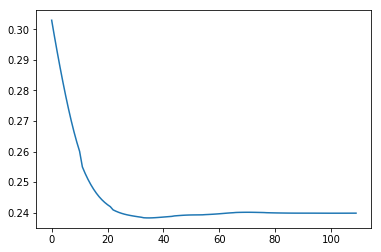

In [345]:
# plot learning curve
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(mse_test)

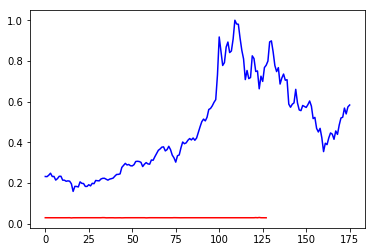

In [346]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
y1 = pred[0]
y2 = y_test
ax1.plot(y1, c = "r")
ax1.plot(y2, c = "b")

In [249]:
y1

array([0.02942401, 0.02968545, 0.02944996, 0.02953054, 0.0295121 ,
       0.02926962, 0.02958772, 0.02987483, 0.02947449, 0.02947984,
       0.02991398, 0.02945613, 0.02932114, 0.02929009, 0.02994879,
       0.02919233, 0.02911114, 0.02965764, 0.02946187, 0.02923963,
       0.02991325, 0.03010636, 0.02907916, 0.02956318, 0.02940984,
       0.02942947, 0.02940271, 0.0296108 , 0.02905797, 0.02911621,
       0.02956032, 0.02922881, 0.02945673, 0.02951084, 0.02942896,
       0.0294849 , 0.02940189, 0.0295132 , 0.02918492, 0.02941421,
       0.02959004, 0.02947689, 0.02917957, 0.02962591, 0.02950268,
       0.0292433 , 0.02959241, 0.02946633, 0.02993151, 0.02947226,
       0.02940878, 0.02937514, 0.02882491, 0.02943888, 0.02940864,
       0.02925738, 0.02955614, 0.02957252, 0.0294451 , 0.02960044,
       0.02944367, 0.02950634, 0.02934083, 0.02952519, 0.0295338 ,
       0.02919232, 0.02947227, 0.02948091, 0.02953467, 0.02914431,
       0.02965691, 0.02955564, 0.02948859, 0.02941754, 0.02948